# import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("D:/back/projects_and_portfolio/Machine Learning/02_Classification/04_svm/mini_project01/cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [4]:
df['BareNuc'].value_counts()

BareNuc
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

# BareNuc to numeric

In [5]:
df['BareNuc']= pd.to_numeric(df['BareNuc'], errors ='coerce')
df = df.dropna()
df['BareNuc']=df['BareNuc'].astype('int64')

In [6]:
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

## visualize

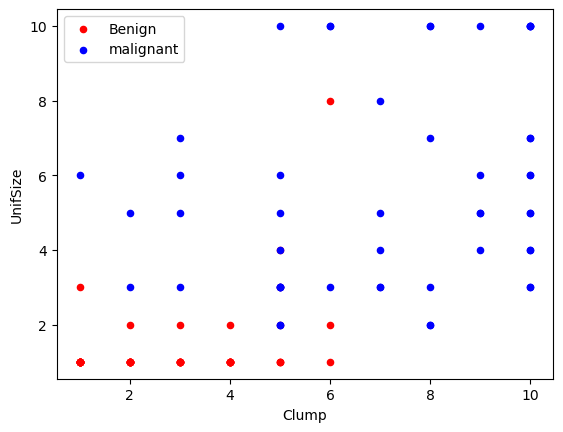

In [7]:
ax1=df[df['Class']==2][0:50].plot(kind='scatter',x='Clump',y='UnifSize',color='red' ,label='Benign');
df[df['Class']==4][0:50].plot(kind='scatter',x='Clump',y='UnifSize',color='blue' ,label='malignant',ax=ax1);
plt.show()

In [8]:
feature_name=df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X=np.asarray(feature_name)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [9]:
feature_name_2=df[['Class']]
Y=np.asarray(feature_name_2)
Y[0:5]

array([[2],
       [2],
       [2],
       [2],
       [2]], dtype=int64)

## split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (546, 9) (546, 1)
Test set: (137, 9) (137, 1)


## model

In [11]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train)
clf

c:\ProgramData\anaconda3\envs\ai\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [12]:
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 4, 2, 4, 2], dtype=int64)

## evaluate

In [13]:
from sklearn.metrics import classification_report
target_names = ['2','4']
print(classification_report(Y_test, yhat, target_names=target_names))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [14]:
from sklearn.metrics import jaccard_score
jaccard_score(Y_test, yhat,pos_label=2)

0.9444444444444444

## confusion matrix

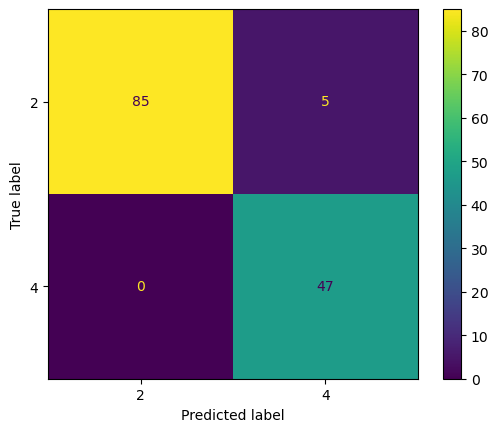

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, yhat, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()